In [21]:
# First, we import pandas and then we can call read_csv()
import pandas as pd

# Importing a library to create a chart:
import matplotlib.pyplot as plt


# Then we open our table file, where we can provide some additional arguments, like the names for our columns. 
# Setting the header row to 0 allows us to substitute our own column names.
df = pd.read_csv('D:\\Desktop\\Study\\100 Days of Code - The Complete Python Pro Bootcamp for 2021\\DATA\\Programming Languages\\QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

Matplotlib is building the font cache; this may take a moment.


In [3]:
# Next, we use .head() and .tail() to look at the first and last 5 rows.
# This allows us to verify that our column naming worked as intended.
df.head()


,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,162
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [4]:
df.tail()

,DATE,TAG,POSTS
1986,2020-07-01 00:00:00,r,5694
1987,2020-07-01 00:00:00,go,743
1988,2020-07-01 00:00:00,ruby,775
1989,2020-07-01 00:00:00,perl,182
1990,2020-07-01 00:00:00,swift,3607


In [5]:
# To check the dimensions of the DataFrame, we use our old friend .shape.
# This tells us we have 1991 rows and 3 columns.
df.shape

(1991, 3)

In [6]:
# To count the number of entries in each column we can use .count().
# Note that .count() will actually tell us the number of non-NaN values in each column.
df.count()

DATE     1991
TAG      1991
POSTS    1991
dtype: int64

In [7]:
# In order to look at the number of entries and the number of posts by programming language,
# we need to make use of the .groupby() method. The key is combining .groupby() with the
# TAG column, which holds as our categories (the names of the programming languages).
# If we .sum() the number of posts then we can see how many posts each programming
# language had since the creation of Stack Overflow.
df.groupby("TAG").sum()

,POSTS
TAG,
assembly,34852
c,336042
c#,1423530
c++,684210
delphi,46212
go,47499
java,1696403
javascript,2056510
perl,65286


In [8]:
# Let's take a closer look at the 'DATE' column in our DataFrame. We can use the
# double square bracket notation to look at the second entry in the column:
df['DATE'][1]

'2008-08-01 00:00:00'

In [9]:
# When we type check the contents of this cell, we see that we are not
# dealing with a date object, but rather with a string:
type(df["DATE"][1])

str

In [10]:
# This is not very handy. Not only will the string format always show the
# unnecessary 00:00:00, but we also don't get the benefit of working with Datetime objects,
# which know how to handle dates and times. Pandas can help us convert the string
# to a timestamp using the to_datetime() method.
print(df["DATE"][1])
type(pd.to_datetime(df["DATE"][1]))

2008-08-01 00:00:00


pandas._libs.tslibs.timestamps.Timestamp

In [11]:
# Let's use Pandas' to_datetime() to convert the entire df['DATE'] column:
df["DATE"] = pd.to_datetime(df["DATE"])
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,162
3,2008-08-01,c,85
4,2008-08-01,python,124


In [12]:
# If We want to change the form of our table, we can use the pivot() method:
# Here's how you pivot our existing DataFrame to get the outcome above:
# The index are the categories for the rows. The columns are the categories for the columns.
# And the values are what you want in the new cells.
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,511.0,164.0,14.0,NaN,222.0,162.0,28.0,161.0,124.0,NaN,73.0,NaN
2008-09-01,28.0,321.0,1649.0,755.0,105.0,NaN,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,NaN
2008-10-01,15.0,303.0,1989.0,811.0,112.0,NaN,1153.0,725.0,127.0,617.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1730.0,735.0,141.0,NaN,958.0,579.0,97.0,504.0,452.0,1.0,160.0,NaN


In [13]:
# To see the dimensions of new DataFrame:
reshaped_df.shape

(145, 14)

In [14]:
# To see all DataFrame columns:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [15]:
# When we count the number of entries per column we see that not all languages are the same.
# The reason is that the .count() method excludes NaN values. When we pivoted the DataFrame
# the NaN values were inserted when there were no posts for a language in that month
# (e.g., Swift in July, 2008).

# We can count the number of entries for porgramming lnguage:
reshaped_df.count()

TAG
assembly      144
c             144
c#            145
c++           144
delphi        144
go            129
java          144
javascript    144
perl          144
php           144
python        144
r             142
ruby          144
swift         135
dtype: int64

In [16]:
# In this case, we don't want to drop the rows that have a NaN value.
# Instead, we want to substitute the number 0 for each NaN value in the DataFrame.
# We can do this with the .fillna() method. The inplace argument means that we are updating reshaped_df.
reshaped_df.fillna(0, inplace=True)


In [17]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,511.0,164.0,14.0,0.0,222.0,162.0,28.0,161.0,124.0,0.0,73.0,0.0
2008-09-01,28.0,321.0,1649.0,755.0,105.0,0.0,1137.0,640.0,131.0,482.0,542.0,6.0,290.0,0.0
2008-10-01,15.0,303.0,1989.0,811.0,112.0,0.0,1153.0,725.0,127.0,617.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1730.0,735.0,141.0,0.0,958.0,579.0,97.0,504.0,452.0,1.0,160.0,0.0


In [18]:
# We can also check if there are any NaN values left in the entire DataFrame with this line.
# Here we are using the .isna() method that we've used before, but we're chaining two more
# things: the values attribute and the any() method. This means we don't have to search
# through the entire DataFrame to spot if .isna() is True.
reshaped_df.isna().values.any()


False

In [19]:
reshaped_df.isna()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-08-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-09-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-10-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2008-11-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-04-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2020-05-01,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
# MATPOTLIB:
# To create our first charts we're going to use a library called Matplotlib.
# There are many different libraries in Python to help us create charts and graphs.
# Matplotlib is an incredibly popular one and it works beautifully in combination with Pandas,
# so let's check it out. We import it in the head of our file. 

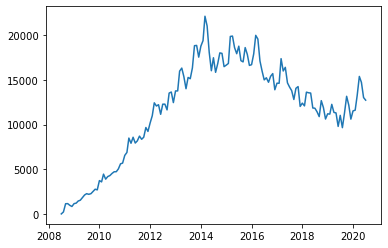

In [23]:
# You can actually show a line chart for the popularity of a programming language using only
# a single line of code.
# All you need to do is supply the values for the horizontal axis (the x-values)
# and the vertical axis (the y-values) for the chart.
# The x-values are our dates and the y-values are the number of posts.
# We can supply these values to the .plot() function by position like so:
plt.plot(reshaped_df.index, reshaped_df['java'])

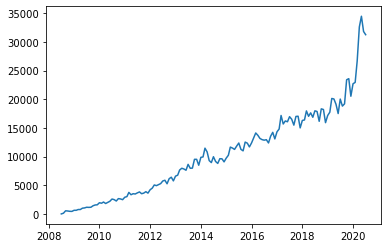

In [24]:
plt.plot(reshaped_df.index, reshaped_df["python"])

In [25]:
# Styling the Chart
# Let's look at a couple of methods that will help us style our chart:

# .figure() - allows us to resize our chart
# .xticks() - configures our x-axis
# .yticks() - configures our y-axis
# .xlabel() - add text to the x-axis
# .ylabel() - add text to the y-axis
# .ylim() - allows us to set a lower and upper bound

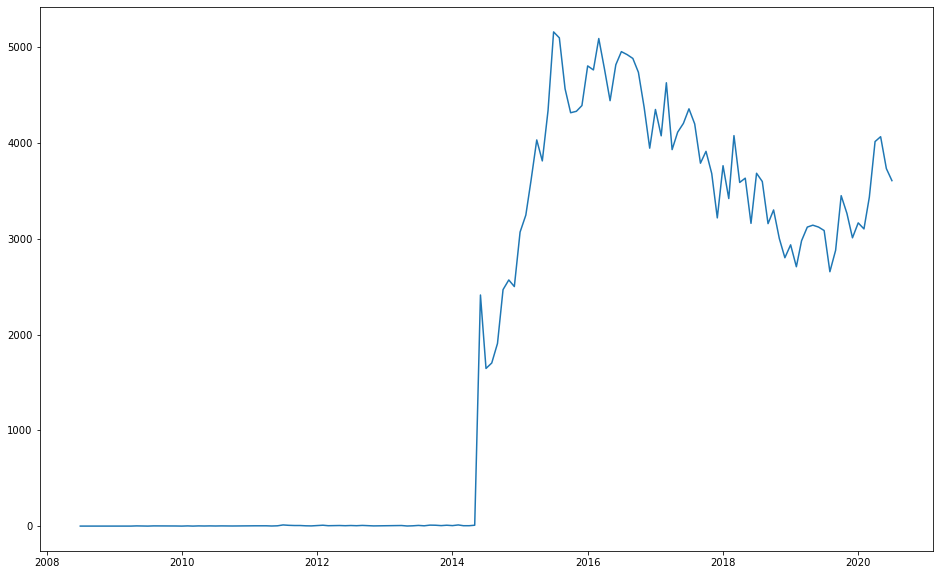

In [26]:
# To make our chart larger we can provide a width (16) and a height (10) as the figsize 
# of the figure.
plt.figure(figsize=(16,10)) 
plt.plot(reshaped_df.index, reshaped_df["swift"])

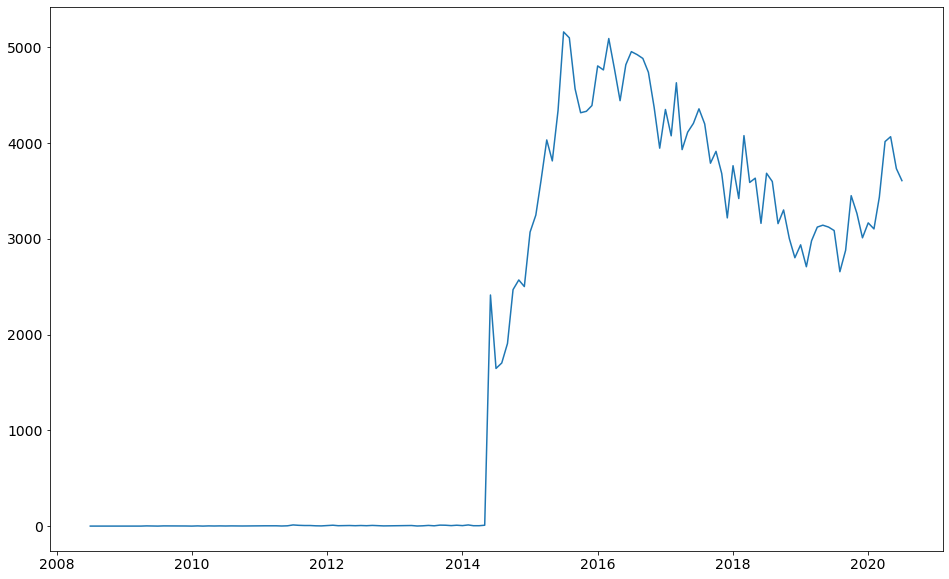

In [28]:
# This will make our chart easier to see. But when we increase the size of the chart,
# we should also increase the fontsize of the ticks on our axes so that they remain easy
# to read:
plt.figure(figsize=(16,10)) 
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(reshaped_df.index, reshaped_df["swift"])

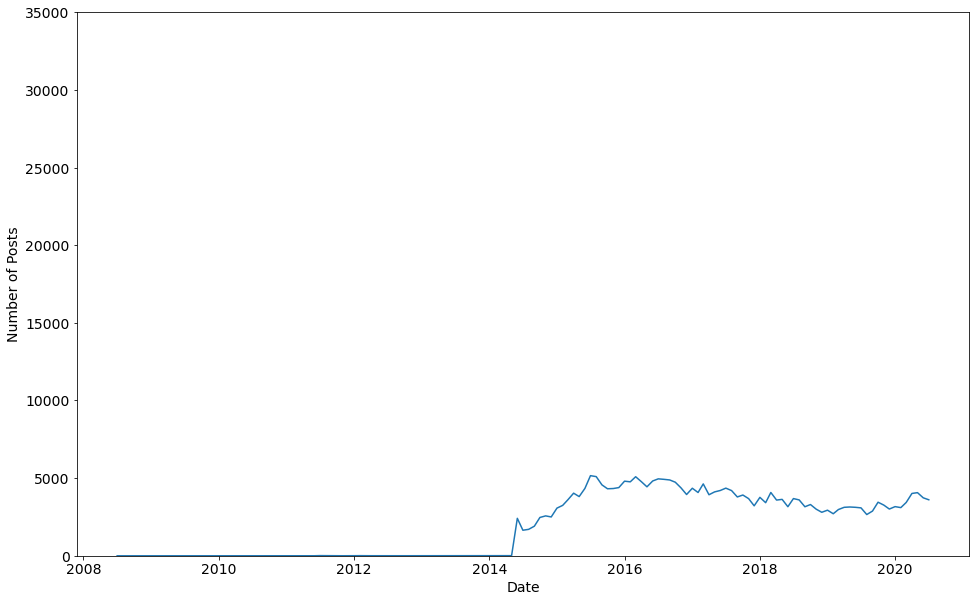

In [30]:
# Now we can add labels. Also, we're never going to get less than 0 posts,
# so let's set a lower limit of 0 for the y-axis with .ylim().
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["swift"])

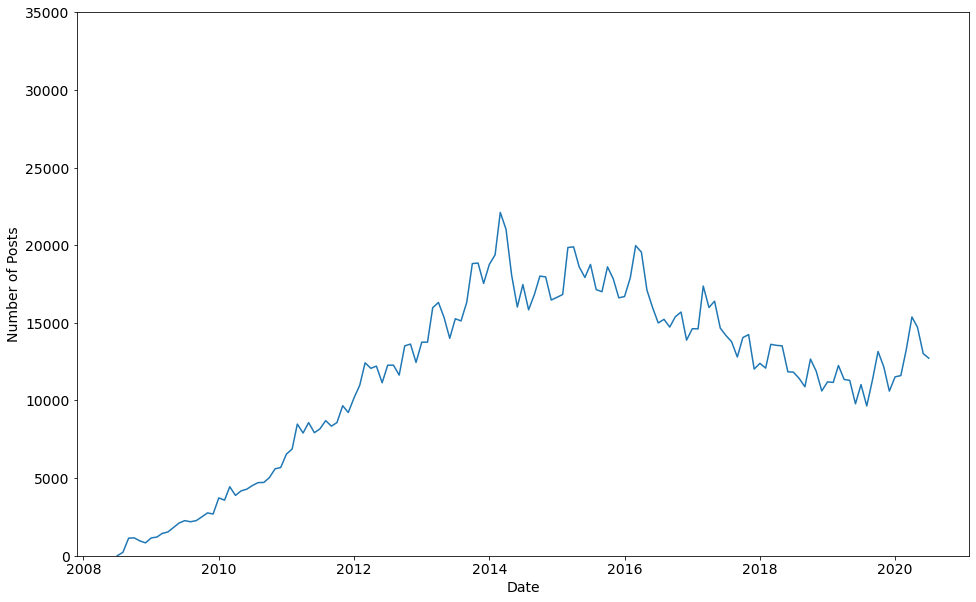

In [31]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df["java"])

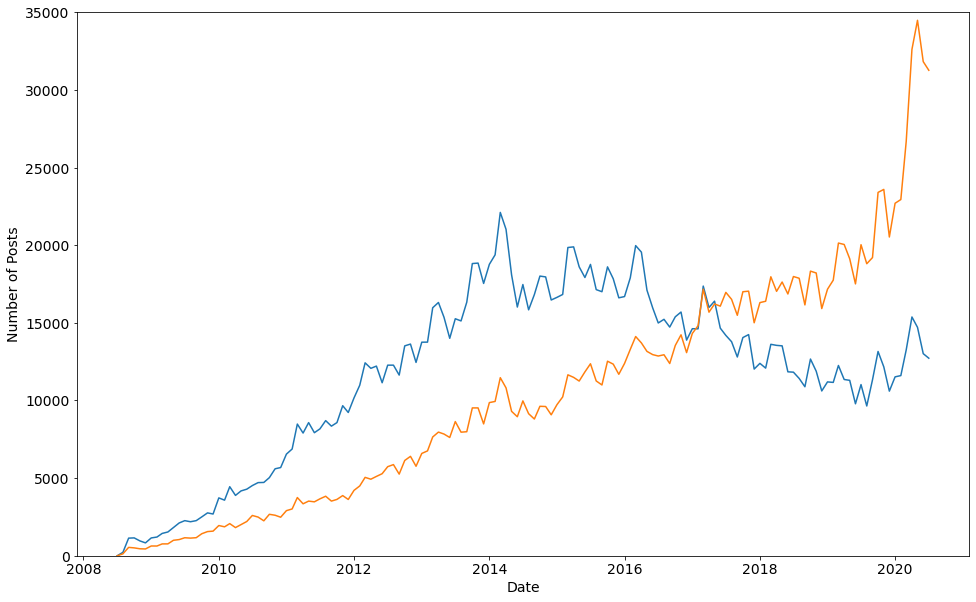

In [32]:
# Two Line Charts Next to Each Other
# The trick is simply calling the .plot() method twice. That's all there is to it! =)
plt.figure(figsize=(16, 10))  # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

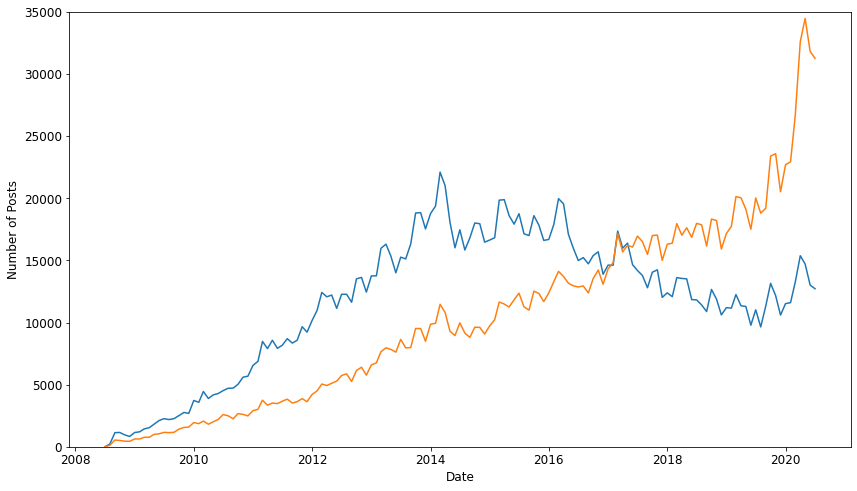

In [33]:
# Two Line Charts Next to Each Other
# The trick is simply calling the .plot() method twice. That's all there is to it! =)
plt.figure(figsize=(14, 8))  # make chart larger
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.ylim(0, 35000)

plt.plot(reshaped_df.index, reshaped_df.java)
plt.plot(reshaped_df.index, reshaped_df.python)

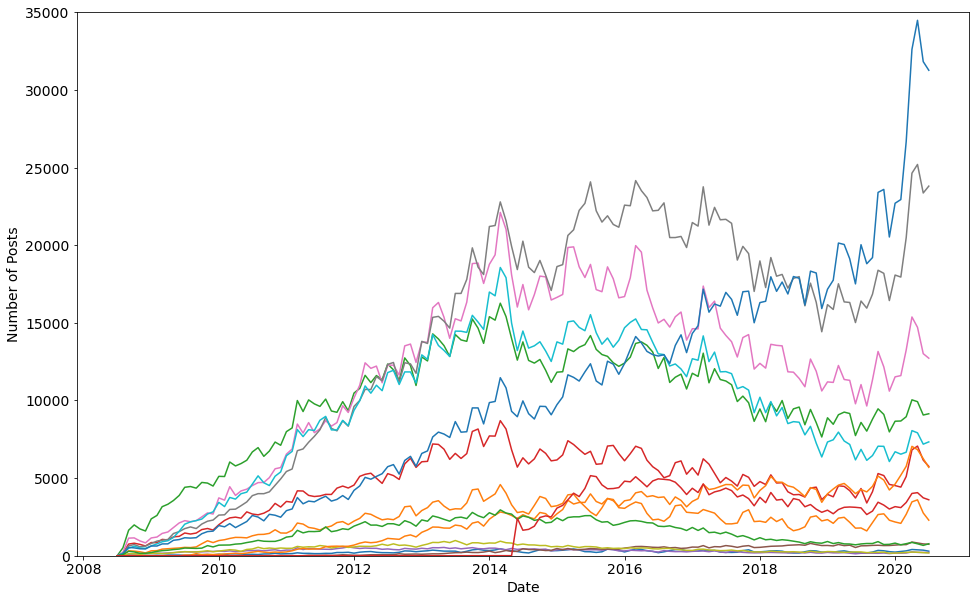

In [35]:
# But what if we wanted to plot all the programming languages on the same chart?
# We don't want to type out .plot() a million times, right? We can actually just use
# a for-loop.
# This will allow us to iterate over each column in the DataFrame and plot it on our chart.
# The final result should look like this:

plt.figure(figsize=(16, 10))  # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

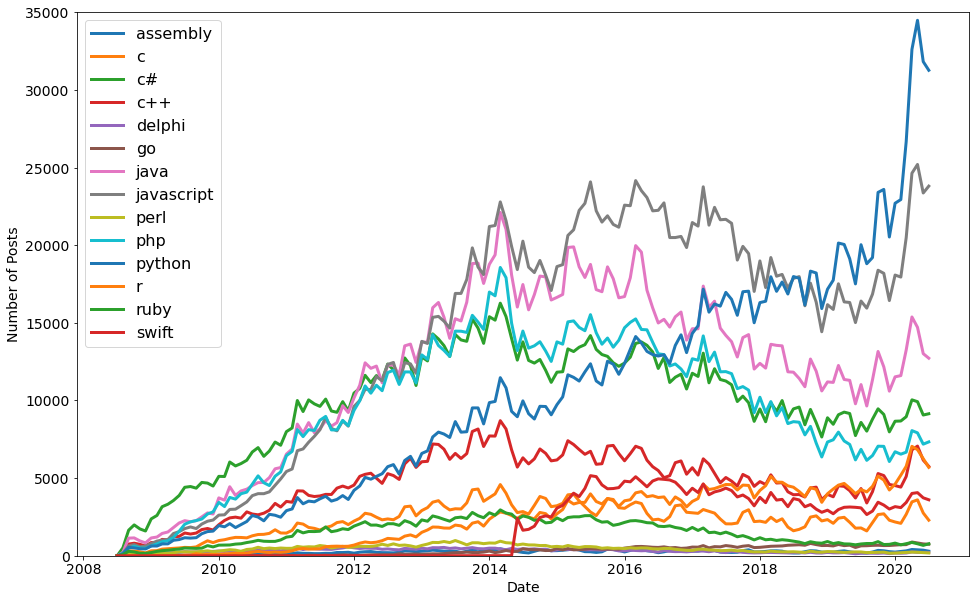

In [36]:
# But wait, which language is which? It's really hard to make out without a legend
# that tells us which colour corresponds to each language. Let's modify the plotting code
# to add a label for each line based on the column name (and make the lines thicker at the
# same time using linewidth). Then let's add a legend to our chart:
plt.figure(figsize=(16, 10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column],
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16) 